In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = yf.download('BTC-USD','2015-01-01','2023-11-30')

[*********************100%***********************]  1 of 1 completed


In [7]:
data = pd.DataFrame(data)

In [11]:
data.reset_index(inplace=True)

In [15]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [17]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3250,37796.792969
3251,37479.121094
3252,37254.167969
3253,37831.085938


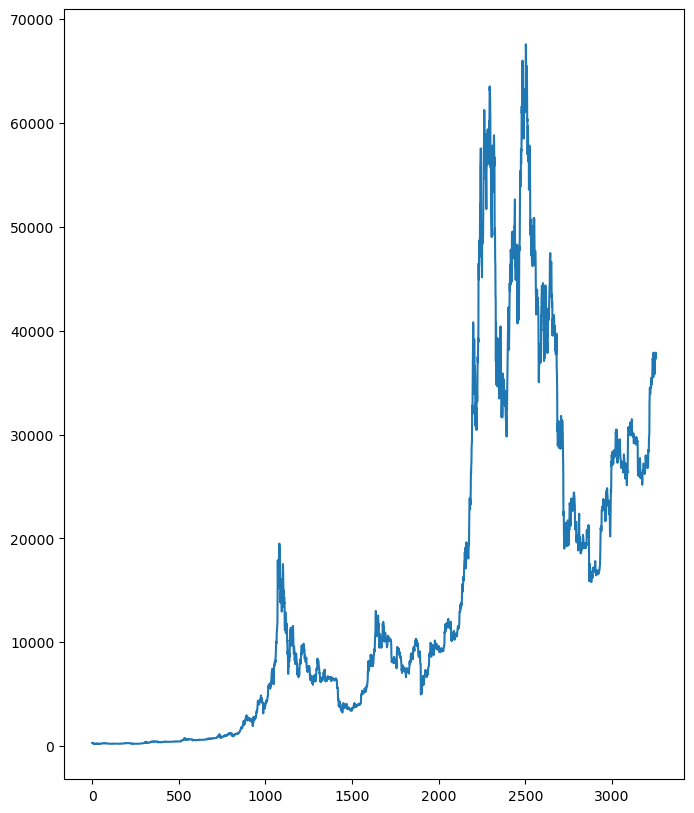

In [19]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [21]:
train_data = data[:-100]
test_data = data[-100:]

In [23]:
train_data.shape

(3155, 1)

In [25]:
test_data.shape

(100, 1)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
train_data_scale = scaler.fit_transform(train_data)

In [31]:
base_days = 100

In [33]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [37]:
x, y = np.array(x), np.array(y)

In [39]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input

In [55]:
model = Sequential()

# Use the Input layer for defining the input shape
model.add(Input(shape=(x.shape[1], 1)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [62]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - loss: 0.0297
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.0046
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.0041
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 0.0037
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 0.0037
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 0.0033
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.0028
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - loss: 0.0032
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 0.0031
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.0032
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - loss: 0.0033
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - loss: 0.0034
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.0027
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 0.0028
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [64]:
test_data

,Close
3155,26031.656250
3156,26431.640625
3157,26162.373047
3158,26047.667969
3159,26008.462891
...,...
3250,37796.792969
3251,37479.121094
3252,37254.167969
3253,37831.085938


In [66]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [68]:
test_data

,Close
0,26930.638672
1,27192.693359
2,27036.650391
3,27398.802734
4,26832.208984
...,...
195,37796.792969
196,37479.121094
197,37254.167969
198,37831.085938


In [70]:
test_data_scale = scaler.transform(test_data)

In [72]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [76]:
x, y = np.array(x), np.array(y)

In [78]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [80]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step


In [82]:
pred

array([[0.3632307 ],
       [0.3572445 ],
       [0.35448876],
       [0.35476822],
       [0.35706428],
       [0.36005163],
       [0.36275154],
       [0.36460656],
       [0.36730152],
       [0.37100732],
       [0.37340057],
       [0.3732498 ],
       [0.37079856],
       [0.36705172],
       [0.3629291 ],
       [0.35919276],
       [0.3563524 ],
       [0.3551412 ],
       [0.35539117],
       [0.35657167],
       [0.35801536],
       [0.35859323],
       [0.35847455],
       [0.35846373],
       [0.3593704 ],
       [0.36143184],
       [0.36418986],
       [0.36688584],
       [0.36915606],
       [0.37130374],
       [0.37328732],
       [0.37423798],
       [0.37382773],
       [0.37231347],
       [0.3699606 ],
       [0.36725062],
       [0.36462492],
       [0.3625926 ],
       [0.3621834 ],
       [0.36362118],
       [0.36644226],
       [0.3710724 ],
       [0.37638187],
       [0.38086915],
       [0.38406795],
       [0.38544327],
       [0.38563162],
       [0.385

In [84]:
pred = scaler.inverse_transform(pred)

In [86]:
pred

array([[24655.758],
       [24252.355],
       [24066.648],
       [24085.482],
       [24240.21 ],
       [24441.523],
       [24623.467],
       [24748.475],
       [24930.086],
       [25179.814],
       [25341.092],
       [25330.932],
       [25165.746],
       [24913.252],
       [24635.434],
       [24383.646],
       [24192.236],
       [24110.615],
       [24127.46 ],
       [24207.014],
       [24304.303],
       [24343.244],
       [24335.246],
       [24334.518],
       [24395.617],
       [24534.535],
       [24720.395],
       [24902.072],
       [25055.06 ],
       [25199.79 ],
       [25333.46 ],
       [25397.523],
       [25369.877],
       [25267.834],
       [25109.277],
       [24926.654],
       [24749.713],
       [24612.758],
       [24585.182],
       [24682.07 ],
       [24872.18 ],
       [25184.201],
       [25541.998],
       [25844.39 ],
       [26059.953],
       [26152.635],
       [26165.326],
       [26143.064],
       [26112.352],
       [26058.129],


In [88]:
#future Bitcoin Price

In [90]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [92]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [94]:
z

array([[34557.98447777],
       [34193.13327371],
       [33478.96337112],
       [32535.38474857],
       [31479.43144104],
       [30402.12545719],
       [29362.94982629],
       [28396.75126456],
       [27520.39782395],
       [26735.91190337],
       [26039.86124887],
       [25424.38521569],
       [24880.61698048],
       [24400.02712109],
       [23976.26526481],
       [23601.74791787],
       [23270.45608376],
       [22978.16220571],
       [22720.92993631],
       [22494.9092868 ],
       [22295.69194975],
       [22120.29754785],
       [21965.97063792],
       [21830.19878598],
       [21710.75875908],
       [21605.68037517],
       [21513.3147867 ],
       [21432.25414698],
       [21361.17495959],
       [21298.87222024]])

In [96]:
model.save('Bitcoin_Price_prediction_Model.keras')